In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def kmeans_with_coordinates_gray(image, k, max_iterations=100):
    """
    KMeans-Clustering mit Intensität und Koordinaten als Features für Graustufenbilder.
    Jeder Cluster bekommt eine eigene Farbe und einen Namen.
    """
    h, w = image.shape
    # Feature-Vektor: [x, y, Intensität]
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.stack([
        X.ravel(), Y.ravel(), image.ravel()
    ], axis=1)

    # Features normalisieren (damit Koordinaten und Intensität vergleichbar sind)
    features = features.astype(float)
    features[:, 0] /= w  # x
    features[:, 1] /= h  # y
    features[:, 2] /= 255.0  # Intensität

    # KMeans
    centroids = init_centroids(k, dim=1)
    for _ in range(max_iterations):
        labels = assign_to_centroids(features, centroids)
        labels = labels.astype(int)  # <--- WICHTIG: Labels als Integer!
        new_centroids = update_centroids(features, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Ergebnisbild einfärben
    label_img = labels.reshape(h, w)
    label_img = label_img.astype(int)  # <--- WICHTIG: Auch hier als Integer!
    colors = plt.cm.get_cmap('tab10', k)
    segmented_image = colors(label_img)[:, :, :3]  # RGB

    # Namen zuweisen
    cell_names = [f'cell{i+1}' for i in range(k)]

    return segmented_image, label_img, cell_names

# Beispielaufruf:
# gray_img = plt.imread('Pfad/zum/HeLa_Bild_grau.png')
# seg_img, label_img, cell_names = kmeans_with_coordinates_gray(gray_img, k=5)
# plt.imshow(seg_img)
# plt.title("KMeans mit Koordinaten und Intensität (Graustufen)")
# plt.show()

C:\Users\Jonny\AppData\Local\Temp\ipykernel_15472\1722422597.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', k)


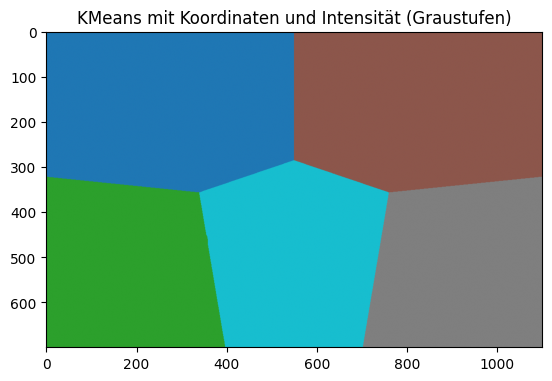

In [16]:
gray_img = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))

# Normalize to 0-255 and convert to uint8
gray_img_norm = ((gray_img - gray_img.min()) / (gray_img.max() - gray_img.min()) * 255).astype(np.uint8)

seg_img, label_img, cell_names = kmeans_with_coordinates_gray(gray_img_norm, 5)
label_img = label_img.astype(int)  # <--- WICHTIG: Labels als Integer!
plt.imshow(seg_img)
plt.title("KMeans mit Koordinaten und Intensität (Graustufen)")
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from Functions.KMeans import assign_to_centroids, update_centroids

def smart_init_centroids(image, k):
    """
    Initialisiert k Zentroiden an den k hellsten Punkten im Bild.
    """
    h, w = image.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.stack([X.ravel(), Y.ravel(), image.ravel()], axis=1)
    # Sortiere nach Intensität (absteigend)
    sorted_idx = np.argsort(features[:, 2])[::-1]
    # Nimm die k hellsten Pixel als Startzentroiden
    centroids = features[sorted_idx[:k]].astype(float)
    # Normiere wie im KMeans
    centroids[:, 0] /= w
    centroids[:, 1] /= h
    centroids[:, 2] /= 255.0
    return centroids

def kmeans_with_coordinates_gray_improved(image, k, max_iterations=100):
    """
    KMeans-Clustering mit Intensität und Koordinaten als Features für Graustufenbilder.
    Zentroiden werden an den k hellsten Punkten initialisiert.
    """
    h, w = image.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.stack([X.ravel(), Y.ravel(), image.ravel()], axis=1)
    features = features.astype(float)
    features[:, 0] /= w
    features[:, 1] /= h
    features[:, 2] /= 255.0

    # Zentroiden gezielt initialisieren!
    centroids = smart_init_centroids(image, k)
    for _ in range(max_iterations):
        labels = assign_to_centroids(features, centroids)
        labels = labels.astype(int)
        new_centroids = update_centroids(features, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    label_img = labels.reshape(h, w).astype(int)
    # Die Cluster nach Mittelwert-Intensität sortieren (hellste zuerst)
    cluster_means = [image[label_img == i].mean() for i in range(k)]
    sorted_clusters = np.argsort(cluster_means)[::-1]
    # Neue Label-Zuordnung: hellste Zelle bekommt label 0, usw.
    relabel = np.zeros_like(label_img)
    for new_label, old_label in enumerate(sorted_clusters):
        relabel[label_img == old_label] = new_label
    label_img = relabel

    colors = plt.cm.get_cmap('tab10', k)
    segmented_image = colors(label_img)[:, :, :3]
    cell_names = [f'cell{i+1}' for i in range(k)]
    return segmented_image, label_img, cell_names

C:\Users\Jonny\AppData\Local\Temp\ipykernel_15472\1722422597.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', k)


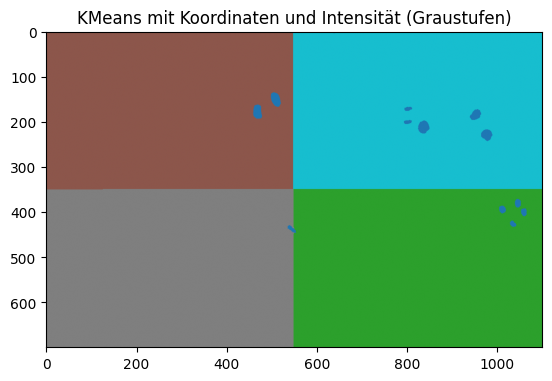

In [18]:
gray_img = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))

# Normalize to 0-255 and convert to uint8
gray_img_norm = ((gray_img - gray_img.min()) / (gray_img.max() - gray_img.min()) * 255).astype(np.uint8)

seg_img, label_img, cell_names = kmeans_with_coordinates_gray(gray_img_norm, 5)
label_img = label_img.astype(int)  # <--- WICHTIG: Labels als Integer!
plt.imshow(seg_img)
plt.title("KMeans mit Koordinaten und Intensität (Graustufen)")
plt.show()

C:\Users\Jonny\AppData\Local\Temp\ipykernel_15472\4023468894.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = np.vstack([[0, 0, 0], plt.cm.get_cmap('tab10', k)(np.arange(k))[:, :3]])


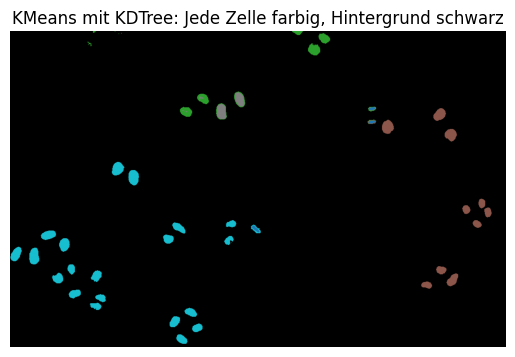

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from Functions.KMeans import update_centroids

def smart_init_centroids(image, mask, k):
    h, w = image.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.stack([X.ravel(), Y.ravel(), image.ravel()], axis=1)
    mask_flat = mask.ravel()
    features_masked = features[mask_flat]
    sorted_idx = np.argsort(features_masked[:, 2])[::-1]
    centroids = features_masked[sorted_idx[:k]].astype(float)
    centroids[:, 0] /= w
    centroids[:, 1] /= h
    centroids[:, 2] /= 255.0
    return centroids

def assign_to_centroids_kdtree(features, centroids):
    tree = KDTree(centroids)
    _, labels = tree.query(features)
    return labels

def kmeans_cells_colored_kdtree(image, k, threshold=30, max_iterations=100):
    h, w = image.shape
    mask = image > threshold
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    features = np.stack([X[mask], Y[mask], image[mask]], axis=1).astype(float)
    features[:, 0] /= w
    features[:, 1] /= h
    features[:, 2] /= 255.0

    centroids = smart_init_centroids(image, mask, k)
    for _ in range(max_iterations):
        labels = assign_to_centroids_kdtree(features, centroids)
        labels = labels.astype(int)
        new_centroids = update_centroids(features, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    label_img = np.zeros((h, w), dtype=int)
    label_img[mask] = labels + 1  # Hintergrund bleibt 0

    colors = np.vstack([[0, 0, 0], plt.cm.get_cmap('tab10', k)(np.arange(k))[:, :3]])
    segmented_image = colors[label_img]

    cell_names = [f'cell{i+1}' for i in range(k)]
    return segmented_image, label_img, cell_names

# Beispielaufruf:
gray_img = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))
gray_img_norm = ((gray_img - gray_img.min()) / (gray_img.max() - gray_img.min()) * 255).astype(np.uint8)

seg_img, label_img, cell_names = kmeans_cells_colored_kdtree(gray_img_norm, k=5, threshold=30)
plt.imshow(seg_img)
plt.title("KMeans mit KDTree: Jede Zelle farbig, Hintergrund schwarz")
plt.axis('off')
plt.show()